In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Load the dataset
video_games = pd.read_csv('vgsales.csv')

In [50]:
# Display the first few rows of the dataset
video_games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [64]:
unique_genres = video_games['Genre'].unique()
unique_genres

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [65]:
unique_platform = video_games['Platform'].unique()
unique_platform

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [66]:
unique_name = video_games['Name'].unique()
unique_name

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Plushees', 'Woody Woodpecker in Crazy Castle 5', 'Know How 2'],
      dtype=object)

In [53]:
# Checking for missing values
missing_values = video_games.isnull().sum()
print(missing_values)

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64


In [15]:
# Replace missing values in the 'Year' column with the median year
median_year = video_games['Year'].median()
video_games['Year'].fillna(median_year, inplace=True)

In [17]:
# Replace missing values in the 'Publisher' column with 'Unknown'
video_games['Publisher'].fillna('Unknown', inplace=True)

In [54]:
# check if the missing values have been handled
print(video_games.isnull().sum())

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64


In [71]:
# Basic statistics
statistics = video_games.describe(include='all')
print ("\nBasic statistics")
statistics


Basic statistics


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598,16598,16598.000000,16598,16598,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
unique,NaN,11493,31,NaN,12,578,NaN,NaN,NaN,NaN,NaN
top,NaN,Need for Speed: Most Wanted,DS,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN
freq,NaN,12,2163,NaN,3316,1351,NaN,NaN,NaN,NaN,NaN
mean,8300.605254,NaN,NaN,2006.416134,NaN,NaN,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,NaN,NaN,5.781686,NaN,NaN,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.040000,0.470000


In [56]:
# Checking data types
data_types = video_games.dtypes
data_types

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [74]:
# Calculate total sales for each region
total_na_sales = video_games['NA_Sales'].sum()
total_eu_sales = video_games['EU_Sales'].sum()
total_jp_sales = video_games['JP_Sales'].sum()
total_other_sales = video_games['Other_Sales'].sum()

In [75]:
# Create a DataFrame to summarize total sales by region
sales_summary = pd.DataFrame({
    'Region': ['North America', 'Europe', 'Japan', 'Other Regions'],
    'Total Sales (in millions)': [total_na_sales, total_eu_sales, total_jp_sales, total_other_sales]
})

In [76]:
# Display the sales summary and the region with the highest sales
print("Sales Summary by Region:")
sales_summary

Sales Summary by Region:


,Region,Total Sales (in millions)
0,North America,4392.95
1,Europe,2434.13
2,Japan,1291.02
3,Other Regions,797.75


In [35]:
# Identify the region with the highest total sales
highest_sales_region = sales_summary.loc[sales_summary['Total Sales (in millions)'].idxmax()]

In [58]:
print("Region with the Highest Total Sales:")
print(highest_sales_region)

Region with the Highest Total Sales:
Region                       North America
Total Sales (in millions)          4392.95
Name: 0, dtype: object


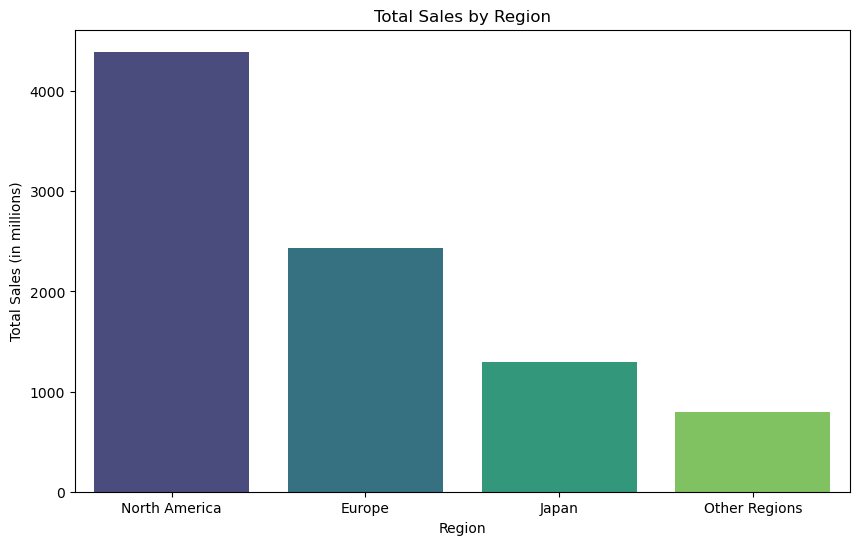

In [77]:
# Plot total sales by region
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Total Sales (in millions)', data=sales_summary, palette='viridis')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales (in millions)')
plt.show()

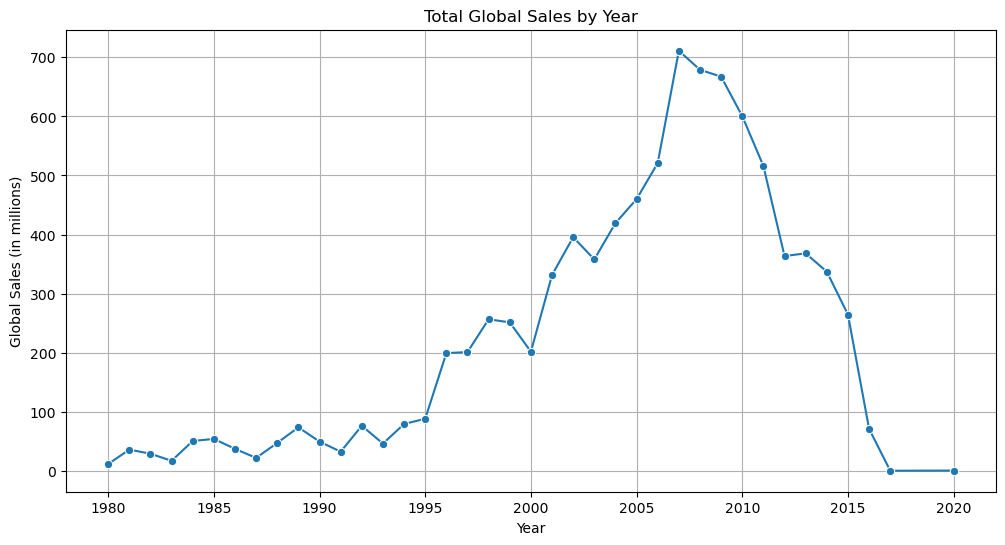

In [46]:
# Total global sales by year
global_sales_by_year = video_games.groupby('Year')['Global_Sales'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Global_Sales', data=global_sales_by_year, marker='o')
plt.title('Total Global Sales by Year')
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.grid(True)
plt.show()

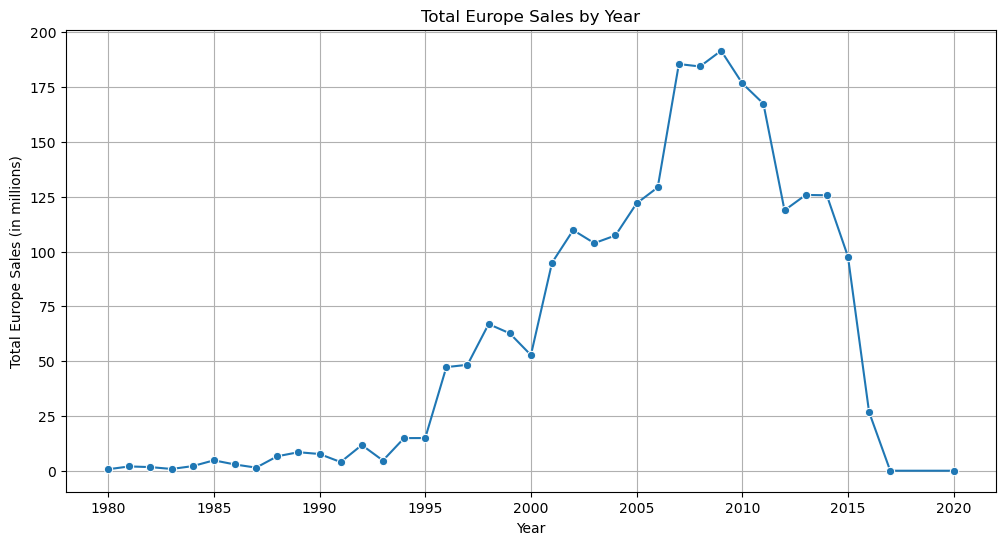

In [43]:
# Plot total Europe sales by year
eu_sales_by_year = video_games.groupby('Year')['EU_Sales'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='EU_Sales', data=eu_sales_by_year, marker='o')
plt.title('Total Europe Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Europe Sales (in millions)')
plt.grid(True)
plt.show()

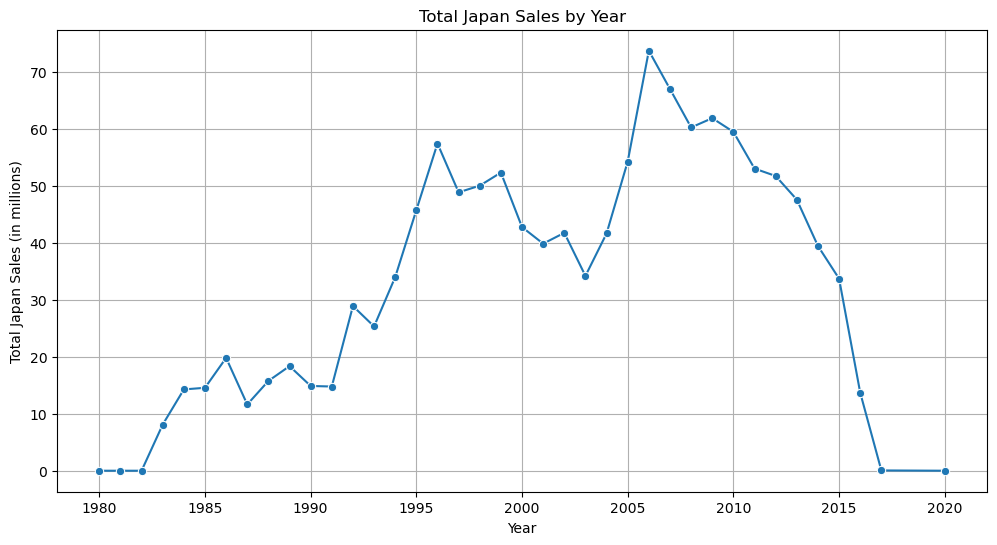

In [44]:
# Calculate total Japan sales by year
jp_sales_by_year = video_games.groupby('Year')['JP_Sales'].sum().reset_index()
# Plot total Japan sales by year
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='JP_Sales', data=jp_sales_by_year, marker='o')
plt.title('Total Japan Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Japan Sales (in millions)')
plt.grid(True)
plt.show()

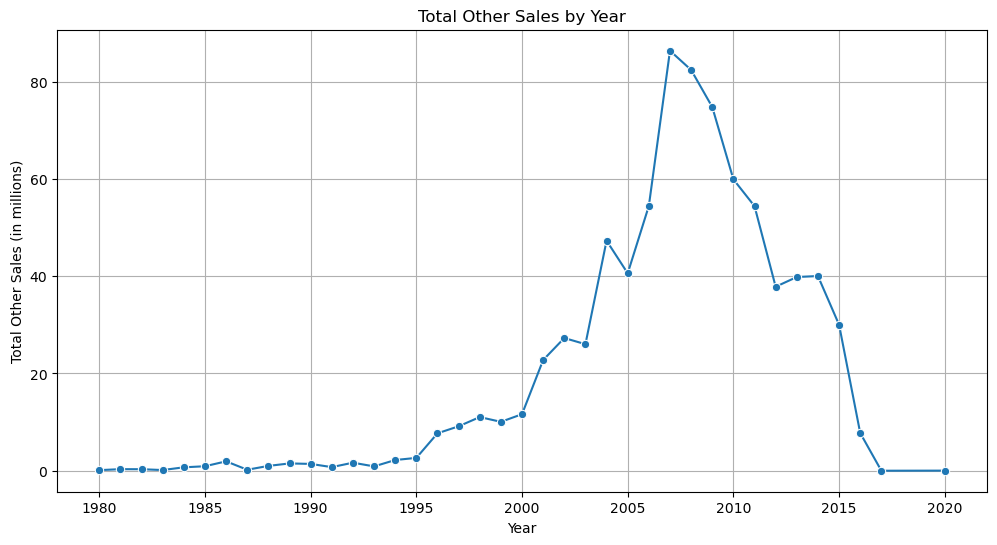

In [49]:
# Calculate total other region sales by year
other_sales_by_year = video_games.groupby('Year')['Other_Sales'].sum().reset_index()
# Plot total Japan sales by year
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Other_Sales', data=other_sales_by_year, marker='o')
plt.title('Total Other Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Other Sales (in millions)')
plt.grid(True)
plt.show()

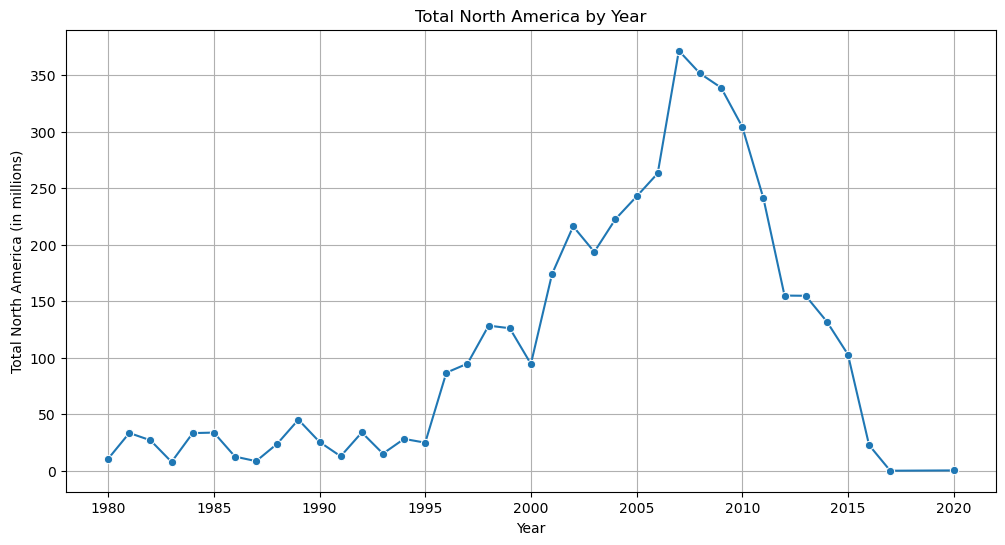

In [68]:
# Calculate total NA sales by year
NA_sales_by_year = video_games.groupby('Year')['NA_Sales'].sum().reset_index()
# Plot total Japan sales by year
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='NA_Sales', data=NA_sales_by_year, marker='o')
plt.title('Total North America by Year')
plt.xlabel('Year')
plt.ylabel('Total North America (in millions)')
plt.grid(True)
plt.show()

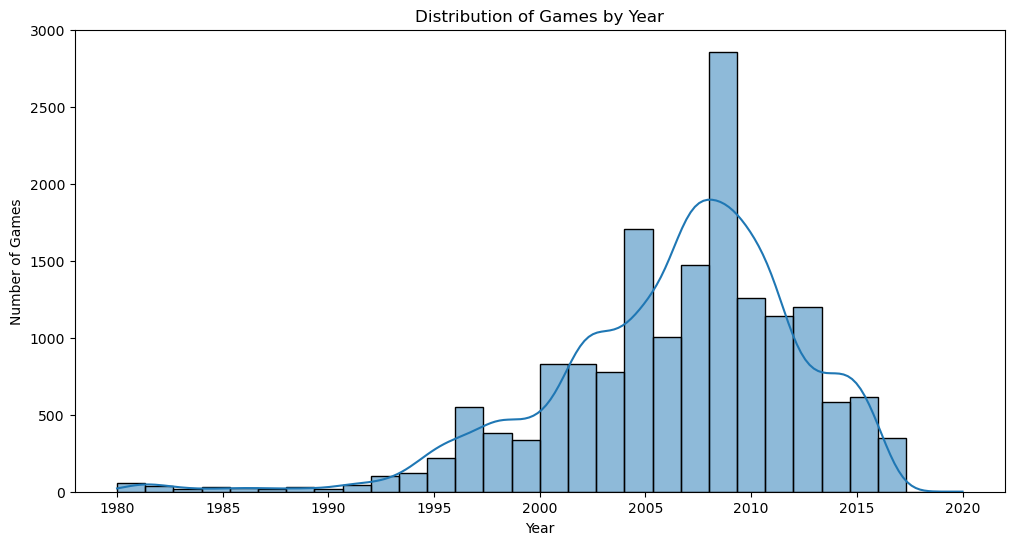

In [21]:
# Distribution of games by year
plt.figure(figsize=(12, 6))
sns.histplot(video_games['Year'], bins=30, kde=True)
plt.title('Distribution of Games by Year')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.show()

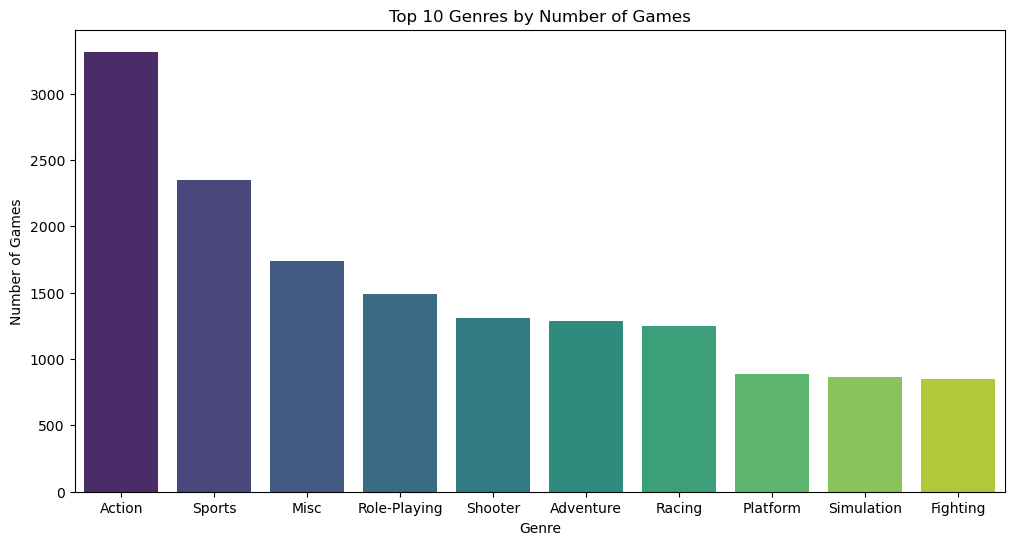

In [22]:
# Top 10 genres by number of games
top_genres = video_games['Genre'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_genres.index, y=top_genres.values, palette='viridis')
plt.title('Top 10 Genres by Number of Games')
plt.xlabel('Genre')
plt.ylabel('Number of Games')
plt.show()

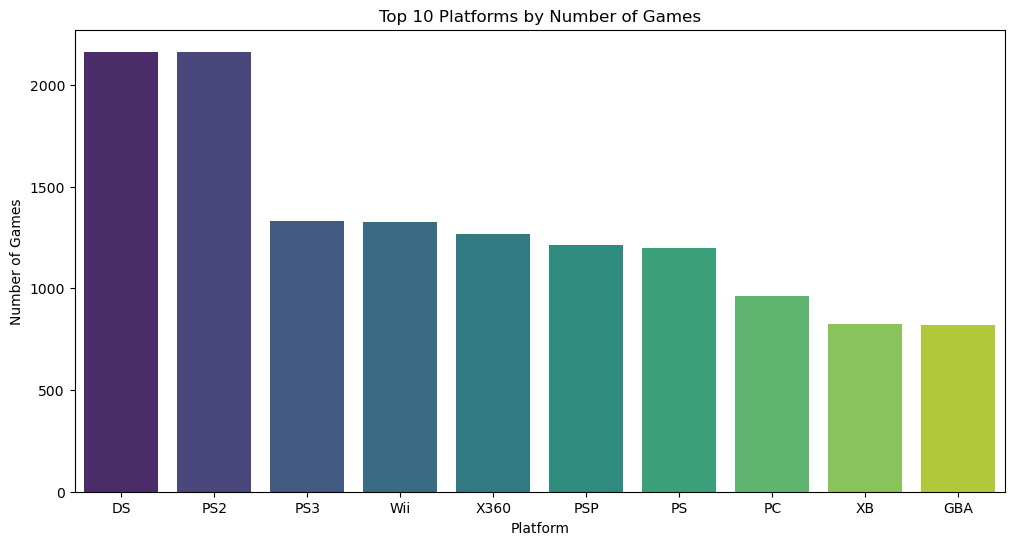

In [23]:
# Top 10 platforms by number of games
top_platforms = video_games['Platform'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_platforms.index, y=top_platforms.values, palette='viridis')
plt.title('Top 10 Platforms by Number of Games')
plt.xlabel('Platform')
plt.ylabel('Number of Games')
plt.show()

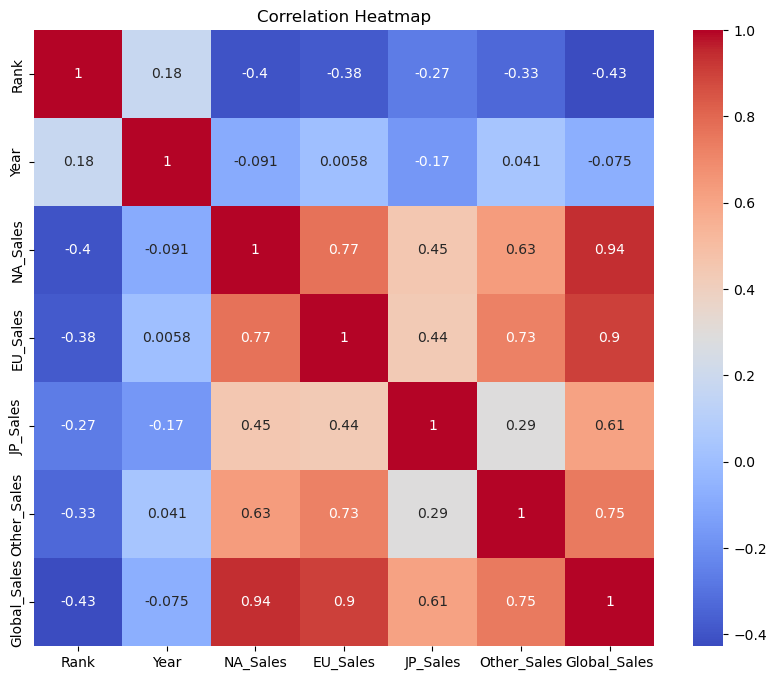

In [60]:
# Correlation heatmap (only numeric columns)
numeric_cols = video_games.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(10, 8))
sns.heatmap(video_games[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()